In [14]:
import h5py
import numpy

summs = ['summO1O2.hdf', 'summO3b.hdf', 'summO3.hdf']

b = h5py.File('./bbh2.hdf', 'r')

m1 = []
m2 = []
ifars = []
stats = []
times = []

for sfile in summs:
    f = h5py.File(sfile, 'r')
    for c in f.keys():
        tid = f[c]['tid'][:]
        ifar = f[c]['ifar'][:]
        stat = f[c]['stat'][:]
        
        ifars.append(ifar)
        stats.append(stat)
        m1.append(b['mass1'][:][tid])
        m2.append(b['mass2'][:][tid])
        times.append(f[c]['H1']['time'][:])
        
m1 = numpy.concatenate(m1)
m2 = numpy.concatenate(m2)
ifars = numpy.concatenate(ifars)
stats = numpy.concatenate(stats)
times = numpy.concatenate(times)

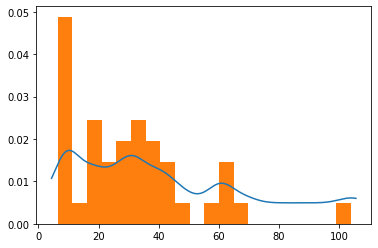

In [100]:
from pycbc.conversions import mchirp_from_mass1_mass2
from astropy.time import Time
from scipy.stats import gaussian_kde

mcb = mchirp_from_mass1_mass2(b['mass1'][:], b['mass2'][:])

mc = mchirp_from_mass1_mass2(m1, m2)
k = ifars > 400

kde = gaussian_kde(mc[k], bw_method=0.2)

x = numpy.arange(mcb.min(), mcb.max()+.1, .1)
y = 0.5 * (kde(x) + (1 / (mcb.max() - mcb.min())))
           
pylab.plot(x, y)

pylab.hist(mc[k], bins=20, density=True)
#pylab.xscale('log')

o = h5py.File('simplepopprior.hdf', 'w')
o['mchirp'] = x
o['prior'] = y
o.close()